In [ ]:
# classification of clothes from fashion mnist data set using artificial neural network

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/home/sunbeam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunbeam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunbeam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunbeam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
#Load the data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Image Label:  9


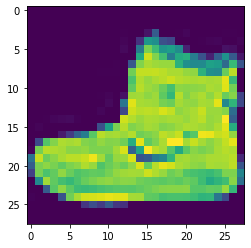

In [13]:
# View a training image
img_index = 0 # can be updated this value to look at other images
img = train_images[img_index]
print("Image Label: " ,train_labels[img_index])
plt.imshow(img)

In [14]:
# Print the shape 
print(train_images.shape) # 60,000 rows of 28 x 28 pixel images
print(test_images.shape)  # 10,000 rows of 28 x 28 pixel images

(60000, 28, 28)
(10000, 28, 28)


In [31]:
Categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Label 	Class
# 0 	T-shirt/top
# 1 	Trouser
# 2 	Pullover
# 3 	Dress
# 4 	Coat
# 5 	Sandal
# 6 	Shirt
# 7 	Sneaker
# 8 	Bag
# 9 	Ankle boot

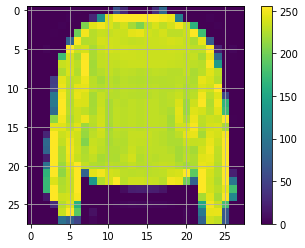

In [32]:
# Visualizing a random training image
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(True)

In [ ]:
# If you inspect this image, you will see that the pixel values fall in the range of 0 to 255.
# We will therefore scale these values to a range of 0 to 1 before feeding to the neural network model.
# For this, the image components are to be typecasted to 'float' type, and are to be divided by 255.

In [33]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# For verification that our image data has been correctly mapped to a label, we will display the first 25 images 
# from the training set and display the class name below each image.

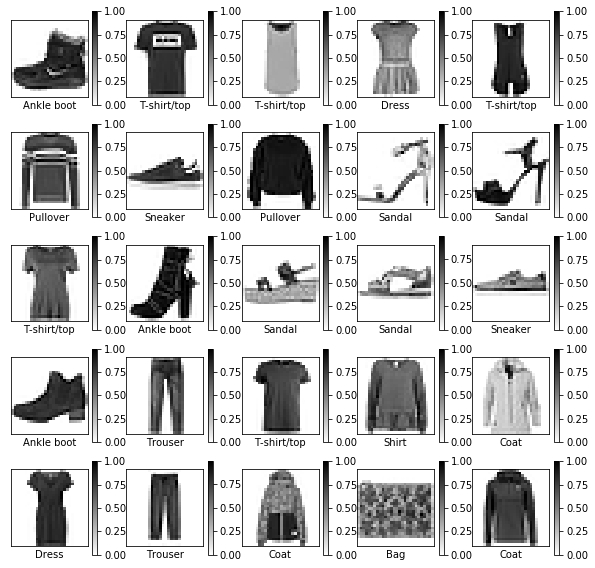

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(Categories[train_labels[i]])

In [35]:
# Create the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # reduce dimensionality of images
    keras.layers.Dense(128, activation=tf.nn.relu), # 128 neurons # hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 unique labels # output layer
])


In [36]:
# Compile the model
model.compile(
    optimizer=tf.train.AdamOptimizer(), # it minimizes the loss function
    loss='sparse_categorical_crossentropy', # it is essentialy a method of evaluating how well our algorithm 
                                            # models perform on the dataset
    metrics = ['accuracy'])

In [37]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32) 
# batch_size tells us number of samples per gradient up there for training 

Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4951 - acc: 0.8269
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3727 - acc: 0.8663
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3337 - acc: 0.8784
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3076 - acc: 0.8882
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2930 - acc: 0.8906
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2790 - acc: 0.8972
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2680 - acc: 0.8998
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2564 - acc: 0.9049
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2453 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 4s 68us/sample - loss: 

In [38]:
# Now, we will compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3334 - acc: 0.8833
Test accuracy: 0.8833


In [ ]:
# The accuracy on the test dataset is a little less than the accuracy on the training dataset. 
# That means the model is overfitting.

In [39]:
# Now, we will be feeding test images.
# The neural network is expected to correctly predict the corresponding label.

predictions = model.predict(test_images)

# Checking the prediction for the 0th (1st) test image
predictions[0]

array([1.8831527e-08, 1.3111454e-10, 9.8728403e-10, 2.3227267e-09,
       3.4073253e-10, 3.2188509e-05, 1.9500215e-08, 2.6368021e-03,
       5.3777951e-09, 9.9733102e-01], dtype=float32)

In [40]:
# Using the argmax function we find out the maximum value (probability) in the array
np.argmax(predictions[0])

9

In [41]:
test_labels[0] # This implies that our model has correctly predicted the category of the object in the test image.

9

In [42]:
# Plotting the Image, the predicted label, the actual label
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(Categories[predicted_label],
                                100*np.max(predictions_array),
                                Categories[true_label]),
                                color=color)

In [43]:
# Plotting the Graph
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# Now we plot the first X test images, their predicted label, and the true label.
# Correct predictions are plotted in blue, incorrect predictions in red.
# The model is accurate to a good extent, and therefore, more of blue will be seen.

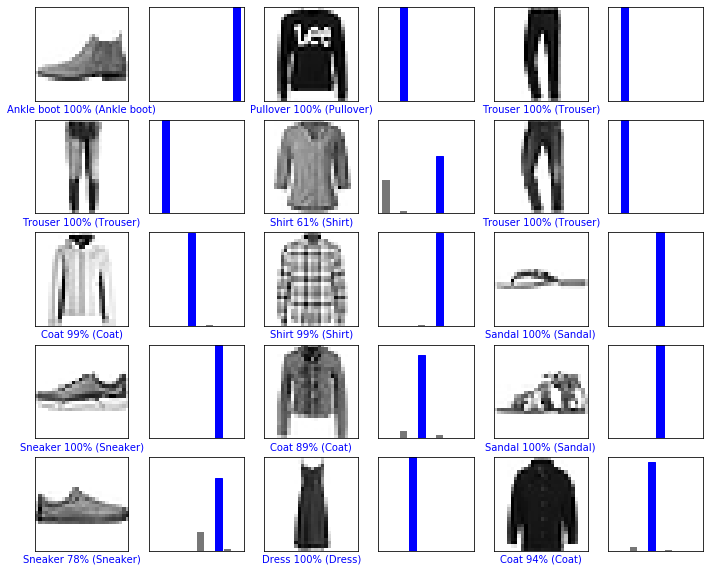

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)